# Project: Apple Stock Price Prediction

> The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future

**Data Dictionarty**

1. Date
2. Open - It is the price at which the financial security opens in the market when trading begins
3. High - The high is the highest price at which a stock traded during a period.
4. Low - Low is the minimum price of a stock in a period
5. Close - Closing price generally refers to the last price at which a stock trades during a regular trading session
6. Adj Close - The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. It is often used when examining historical returns or doing a detailed analysis of past performance.
7. Volume - Volume measures the number of shares traded in a stock or contracts traded in futures or options.

## Geting Started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Get the data

In [2]:
stocks = pd.read_csv("AAPL_stock.csv")
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [3]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10443 entries, 0 to 10442
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10443 non-null  object 
 1   Open       10443 non-null  float64
 2   High       10443 non-null  float64
 3   Low        10443 non-null  float64
 4   Close      10443 non-null  float64
 5   Adj Close  10443 non-null  float64
 6   Volume     10443 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 571.2+ KB


In [4]:
stocks.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [6]:
print(f'Dataframe contains stock prices between {stocks.Date.min()} to {stocks.Date.max()}')
print(f'Total Days = {(stocks.Date.max() - stocks.Date.min()).days} days')

Dataframe contains stock prices between 1980-12-12 00:00:00 to 2022-05-12 00:00:00
Total Days = 15126 days


In [7]:
print(f'The maximum price of the stocks is:{stocks.Close.max()}')
print(f'The minimum price of the stocks is:{stocks.Close.min()}')

The maximum price of the stocks is:182.009995
The minimum price of the stocks is:0.049107


In [8]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10443.000000,10443.000000,10443.000000,10443.000000,10443.000000,1.044300e+04
mean,14.453559,14.611925,14.294785,14.458603,13.823986,3.314118e+08
std,31.337795,31.699692,30.979093,31.351249,31.046629,3.390498e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289063,0.275893,0.282891,0.235214,1.241298e+08
50%,0.472321,0.481429,0.464286,0.473214,0.389186,2.188788e+08
75%,14.445892,14.601071,14.297321,14.463393,12.409363,4.116770e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


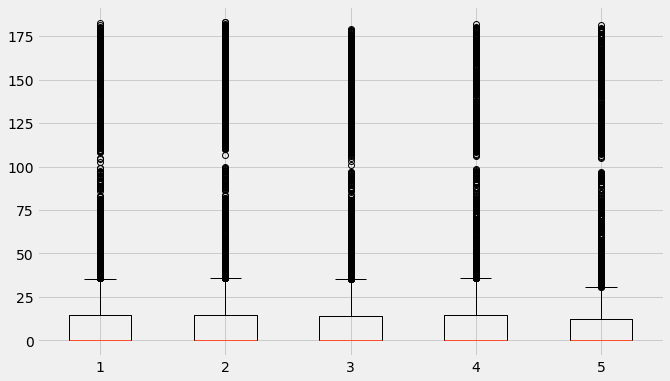

In [9]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(stocks[['Open','High','Low','Close','Adj Close']]);

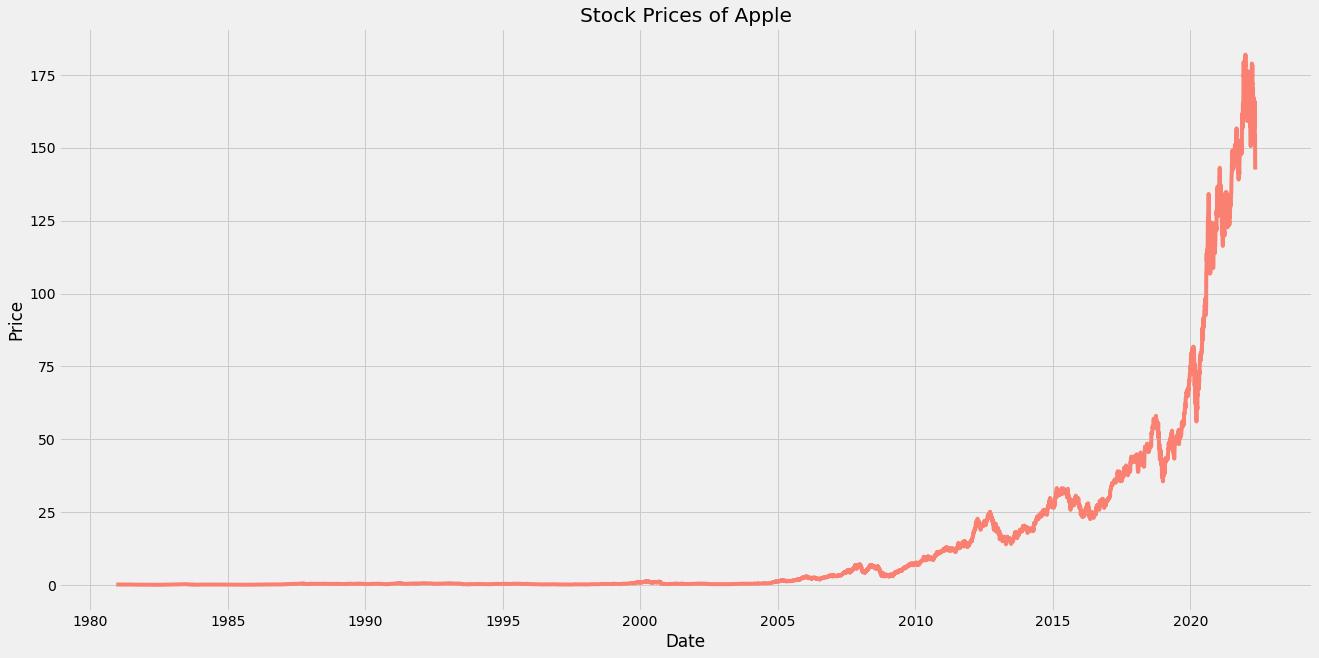

In [10]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(stocks['Date'],stocks['Close'],color='salmon');
ax.set(title='Stock Prices of Apple',
       xlabel='Date',
       ylabel='Price');

In [11]:
corr_matrix = stocks.corr()
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999945,0.999925,0.999854,0.999512,-0.193404
High,0.999945,1.000000,0.999909,0.999925,0.999608,-0.192822
Low,0.999925,0.999909,1.000000,0.999930,0.999570,-0.194356
Close,0.999854,0.999925,0.999930,1.000000,0.999662,-0.193608
Adj Close,0.999512,0.999608,0.999570,0.999662,1.000000,-0.196533
Volume,-0.193404,-0.192822,-0.194356,-0.193608,-0.196533,1.000000


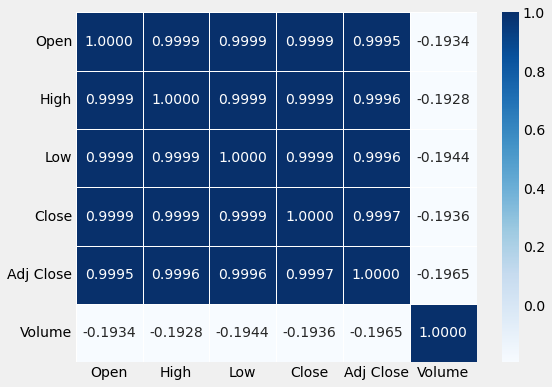

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,
            annot=True, 
            linewidths=0.5, 
            fmt= ".4f", 
            cmap="Blues");

In [13]:
stocks2 = stocks.copy()
stocks2['open-high'] = stocks['Open']-stocks['High']
stocks2['open-low'] = stocks['Open'] - stocks['Low']
stocks2['close-high'] = stocks['Close']-stocks['High']
stocks2['close-low'] = stocks['Close'] - stocks['Low']
stocks2['high-low'] = stocks['High'] - stocks['Low']
stocks2['open-close'] = stocks['Open'] - stocks['Close']
stocks2 = stocks2.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
stocks2.head()

,Date,Volume,open-high,open-low,close-high,close-low,high-low,open-close
0,1980-12-12,469033600,-0.000558,0.000000,-0.000558,0.0,0.000558,0.000000
1,1980-12-15,175884800,0.000000,0.000558,-0.000558,0.0,0.000558,0.000558
2,1980-12-16,105728000,0.000000,0.000558,-0.000558,0.0,0.000558,0.000558
3,1980-12-17,86441600,-0.000558,0.000000,-0.000558,0.0,0.000558,0.000000
4,1980-12-18,73449600,-0.000558,0.000000,-0.000558,0.0,0.000558,0.000000


<AxesSubplot:>

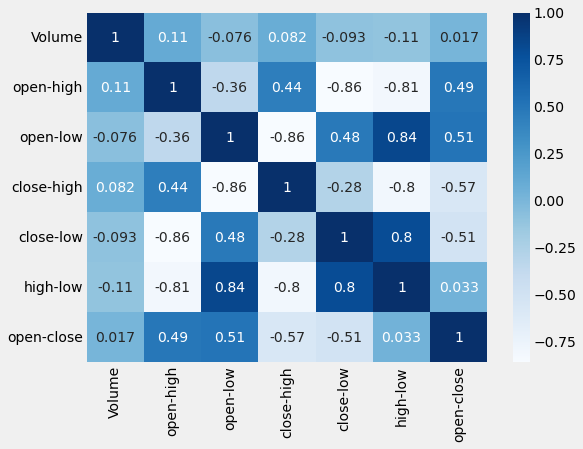

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(stocks2.corr(),cmap='Blues',annot=True)

In [15]:
stocks2= stocks.copy()
stocks2['Day'] = stocks['Date'].dt.day_name()
stocks2['Month'] = stocks['Date'].dt.month
stocks2['Year'] = stocks['Date'].dt.year
stocks2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,Friday,12,1980
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,Monday,12,1980
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,Tuesday,12,1980
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,Wednesday,12,1980
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,Thursday,12,1980


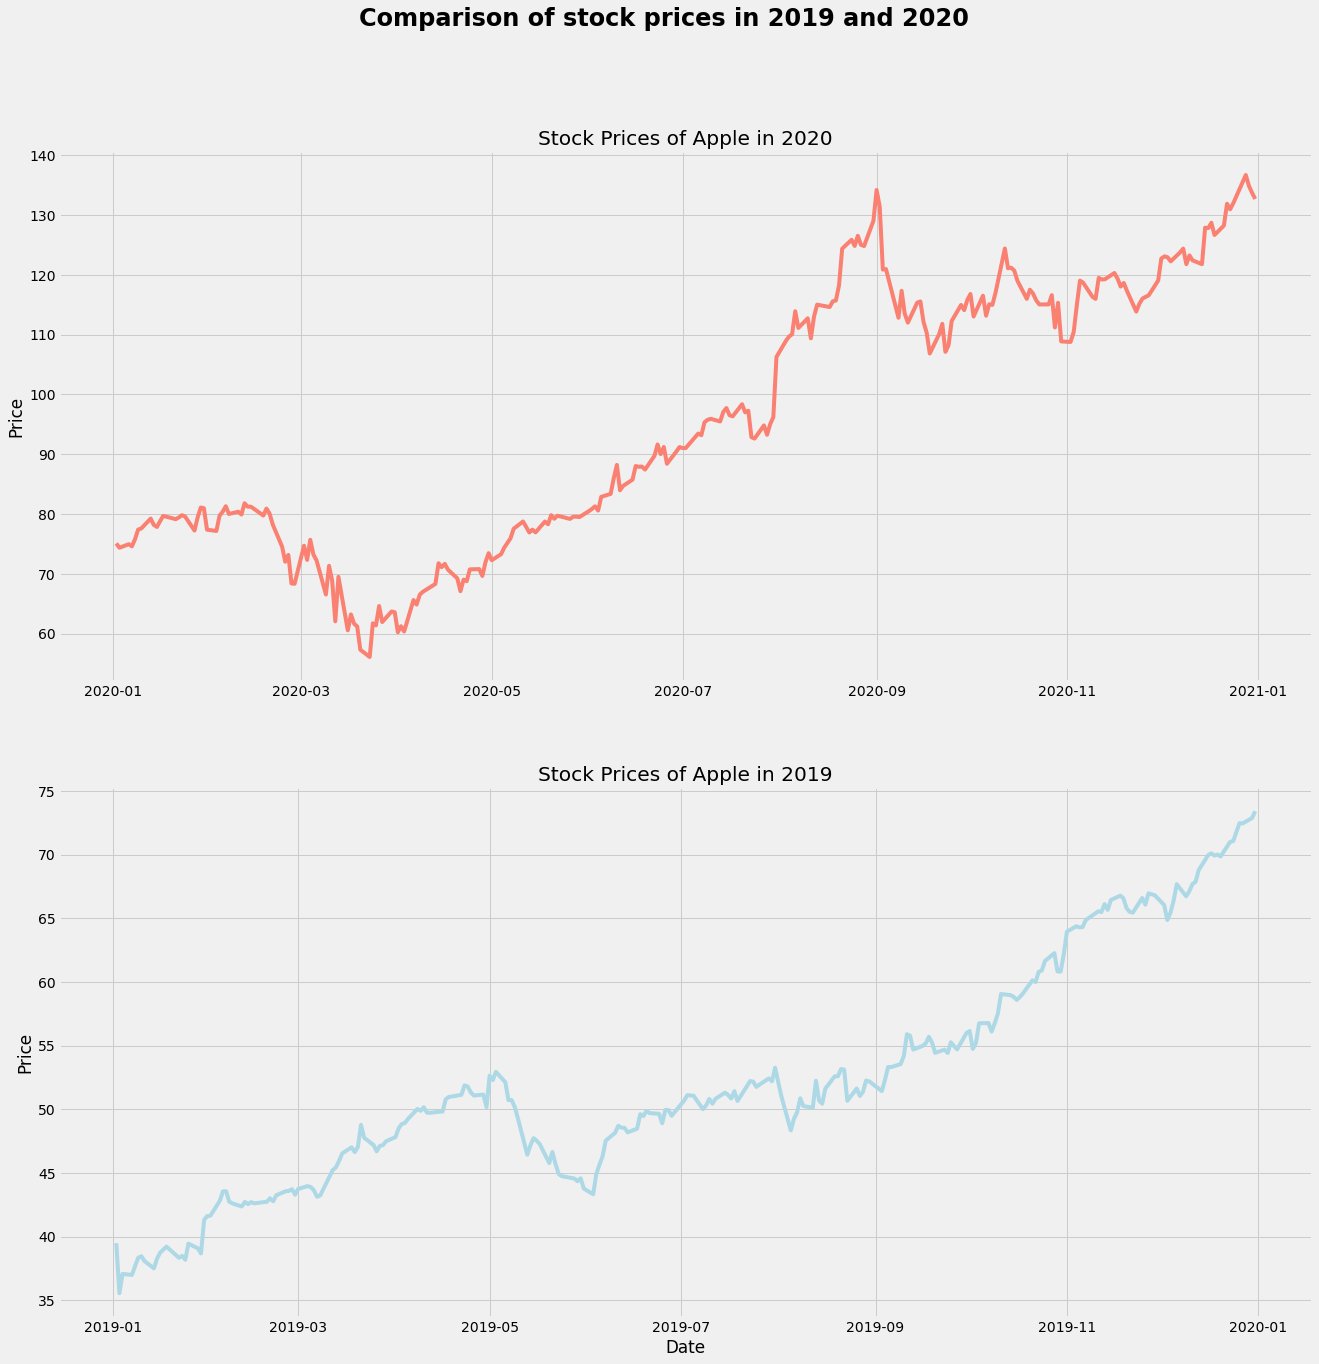

In [16]:
stocks2019 = stocks2[stocks2.Year==2019]
stocks2020 = stocks2[stocks2.Year==2020]

fig,(ax0,ax1) = plt.subplots(ncols=1,nrows=2,figsize=(20,20))

ax0.plot(stocks2020['Date'],stocks2020['Close'],color='salmon');
ax1.plot(stocks2019['Date'],stocks2019['Close'],color='lightblue')

ax0.set(title='Stock Prices of Apple in 2020',
       ylabel='Price');
ax1.set(title='Stock Prices of Apple in 2019',
        xlabel='Date',
        ylabel='Price');

fig.suptitle('Comparison of stock prices in 2019 and 2020',
            fontsize=24,
             fontweight='bold');

In [17]:
result = stocks2.groupby(['Year','Month'])

In [18]:
openPrice = pd.DataFrame(result['Open'].apply(lambda row:row.iloc[0]).reset_index())
openPrice.head()

,Year,Month,Open
0,1980,12,0.128348
1,1981,1,0.154018
2,1981,2,0.119420
3,1981,3,0.118862
4,1981,4,0.108817


In [19]:
closePrice = pd.DataFrame(result['Close'].apply(lambda row:row.iloc[-1]).reset_index())
closePrice.head()

,Year,Month,Close
0,1980,12,0.152344
1,1981,1,0.126116
2,1981,2,0.118304
3,1981,3,0.109375
4,1981,4,0.126674


In [20]:
diff = pd.merge(openPrice,closePrice,how='left',on=['Year','Month'])
diff['return'] = 100*(diff.Close - diff.Open)/diff.Open
diff=diff[1:493]
diff.head()

,Year,Month,Open,Close,return
1,1981,1,0.154018,0.126116,-18.116064
2,1981,2,0.119420,0.118304,-0.934517
3,1981,3,0.118862,0.109375,-7.981525
4,1981,4,0.108817,0.126674,16.410120
5,1981,5,0.126674,0.147879,16.739820


In [21]:
diff = diff.pivot(index='Year',columns='Month',values='return')
diff.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
diff.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1981,-18.116064,-0.934517,-7.981525,16.410120,16.739820,-21.509477,-3.381438,-19.499673,-28.655265,31.148649,-6.875658,18.792019
1982,-7.909124,-10.429859,-8.162768,-16.901604,-8.196240,-8.107585,5.881940,29.729424,3.545874,37.162334,25.615946,-6.274113
1983,36.819848,11.620579,-7.397279,19.526445,14.356875,-15.368116,-28.644497,6.810241,-37.919360,-2.162984,-9.944161,19.631706
1984,1.538363,6.061127,-5.714749,26.767791,-7.480546,-9.786637,-3.774175,3.922206,-5.189174,-0.499969,-0.999937,17.676553
1985,-0.429158,-14.655039,-10.606294,-3.954562,-18.235195,5.881965,-12.413026,-5.512833,5.001195,18.252670,8.054410,9.316148


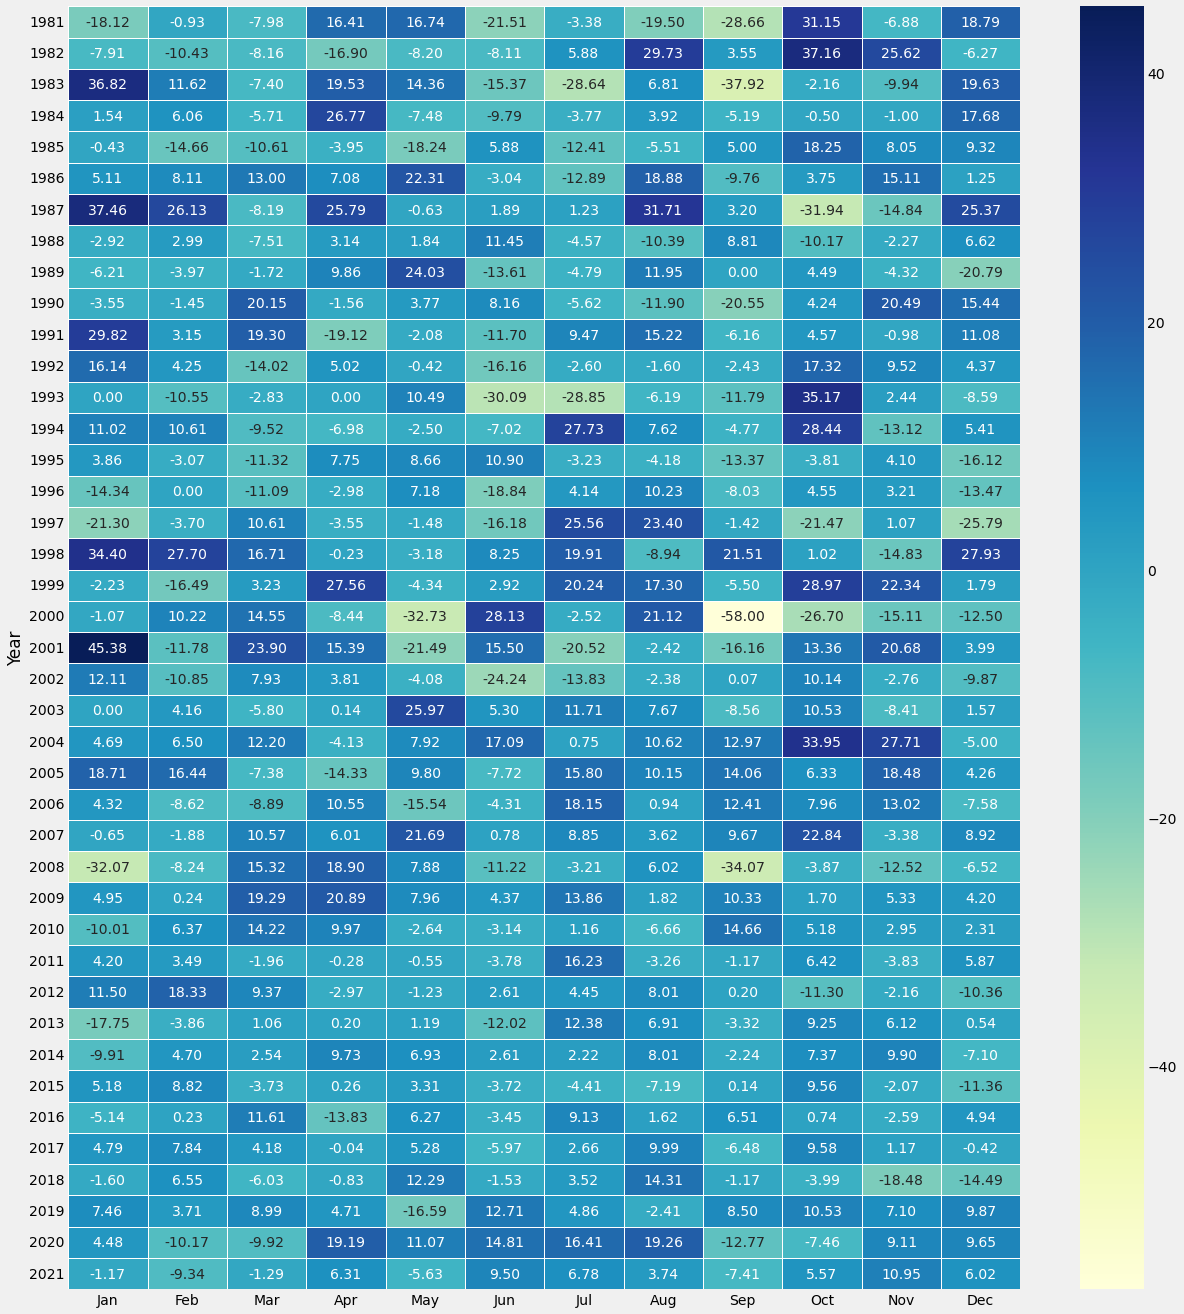

In [22]:
plt.figure(figsize=(19,22))
sns.heatmap(diff,
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [23]:
#Building the regression model
from sklearn.model_selection import train_test_split

#For Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation `
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [24]:
X = np.array(stocks.index).reshape(-1,1)
y = stocks.Close
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
#Importing the models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [26]:
#Put models in a dictionary
model = {"Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [27]:
model_scores = fit_and_score(model,X_train,X_test,y_train,y_test)

In [28]:
model_scores

{'Linear Regression': 0.4212820710574847, 'Random Forest': 0.9997046147560987}

In [29]:
model_compare = pd.DataFrame(model_scores,index =['r2_score'])
model_compare

,Linear Regression,Random Forest
r2_score,0.421282,0.999705


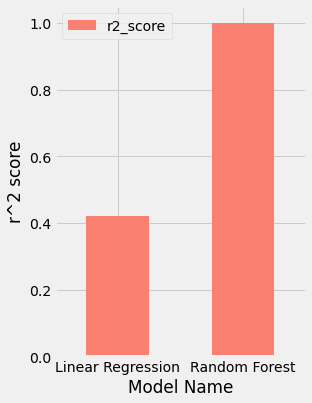

In [30]:
model_compare.T.plot.bar(figsize=(4,6),color='salmon')
plt.xlabel('Model Name')
plt.ylabel('r^2 score')
plt.xticks(rotation=0);

As random forest Regressor has morre r^2 value, Therefore we will be using the random forest regressor.

In [31]:
np.random.seed(42)
model = RandomForestRegressor().fit(X_train,y_train)

In [32]:
y_preds = model.predict(X_test)

In [33]:
#Model Evaluation
r2_score(y_test,y_preds)

0.9997046147560987

In [34]:
mse(y_test,y_preds)

0.2928899288485277

## Saving the model

In [35]:
from joblib import dump, load

dump(model, filename="Apple_Stock_Predictor.joblib");